## Import libraries

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sig_seasontrans import SMSig

# Specify current directory create output directory if it does not exist
os.getcwd()

'g:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\libs\\SMSig'

In [2]:
def to_datetime(df, time_column, format="%Y-%m-%d %H:%M:%S"):
    df = df.copy()
    df[time_column] = pd.to_datetime(df[time_column], format=format)
    return df.set_index(time_column)

## Read in observed data

### Little Washita

In [3]:
_data = pd.read_csv(r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\LittleWashita\test_sm_basinavg.csv")
_data = to_datetime(_data, "Time")
data = _data["Soil Moisture Content"]

data.head()

Time
2006-09-19 00:00:00    0.179808
2006-09-19 01:00:00    0.179020
2006-09-19 02:00:00    0.178306
2006-09-19 03:00:00    0.177500
2006-09-19 04:00:00    0.176834
Name: Soil Moisture Content, dtype: float64

In [4]:
# Evaluate using seasonal soil moisture signature
sig_obs = SMSig(
    ts_time=data.index.to_numpy(),
    ts_value=data.to_numpy(),
    plot_results=True,
    plot_label="obs",
    verbose=True
)

In [5]:
_t_valley_manual_input = pd.read_csv(r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\LittleWashita\seasonal_cycel_valleys.csv", header=None)
t_valley_manual_input = pd.to_datetime(_t_valley_manual_input[0])
t_valley_manual_input

0   2006-10-14
1   2007-08-18
2   2008-10-05
3   2009-07-27
4   2010-08-31
5   2011-08-11
6   2012-09-12
Name: 0, dtype: datetime64[ns]

Processing 2006:0
dry2wet Shift=0.11 slope=0.00030 start timing: 9.502304 end timing: 200.000000


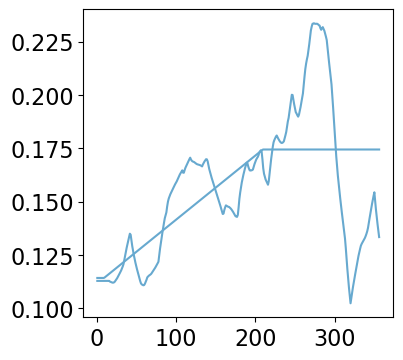

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2007:0
dry2wet Shift=0.13 slope=0.00024 start timing: 19.377570 end timing: 135.622452


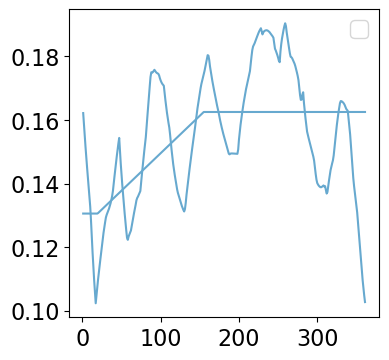

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2008:0
dry2wet Shift=0.04 slope=0.00048 start timing: 133.999948 end timing: 87.546983


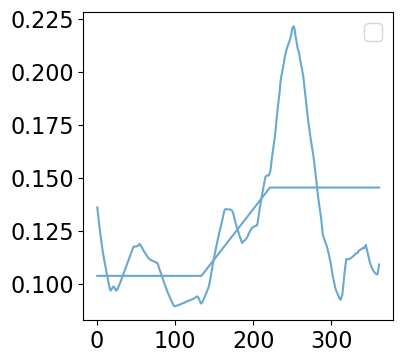

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2009:0
dry2wet Shift=-0.01 slope=0.00183 start timing: 62.972724 end timing: 39.076299


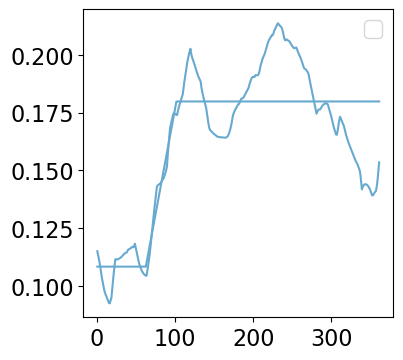

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2010:0
dry2wet Shift=0.06 slope=0.00172 start timing: 13.834471 end timing: 30.000000


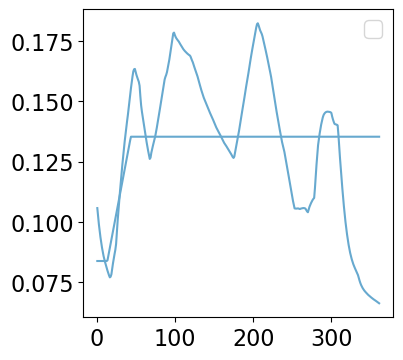

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2011:0
dry2wet Shift=-0.05 slope=0.00182 start timing: 73.815585 end timing: 53.278305


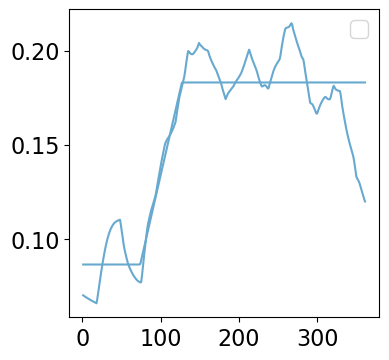

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2006:1
wet2dry Shift=0.37 slope=-0.00161 start timing: 110.999993 end timing: 30.010026


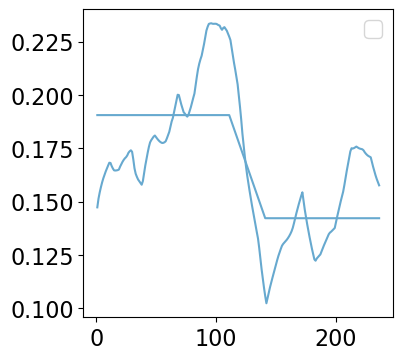

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2007:1
wet2dry Shift=0.23 slope=-0.00063 start timing: 86.629443 end timing: 106.370556


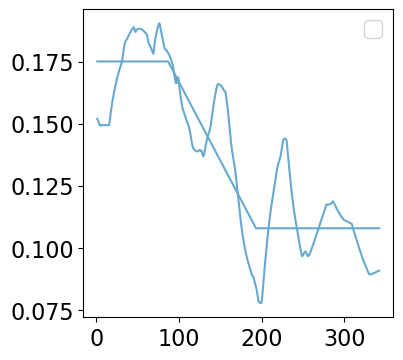

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2008:1
wet2dry Shift=0.29 slope=-0.00142 start timing: 83.331359 end timing: 30.000000


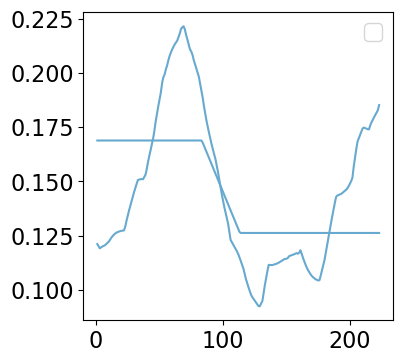

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2009:1
wet2dry Shift=0.22 slope=-0.00038 start timing: 60.244031 end timing: 161.755978


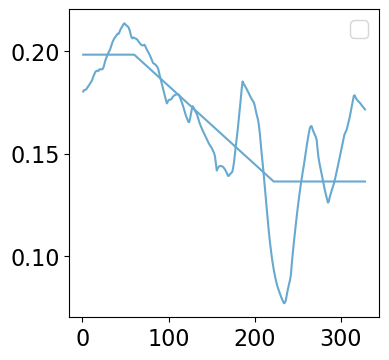

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2010:1
wet2dry Shift=0.17 slope=-0.00049 start timing: 20.000120 end timing: 131.184629


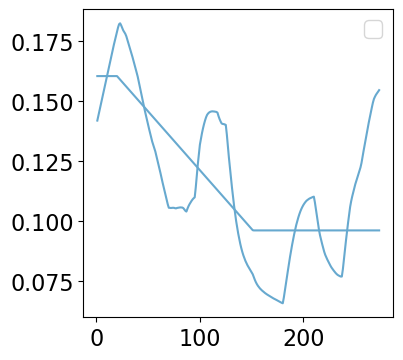

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2011:1
wet2dry Shift=0.36 slope=-0.00135 start timing: 129.841772 end timing: 68.202727


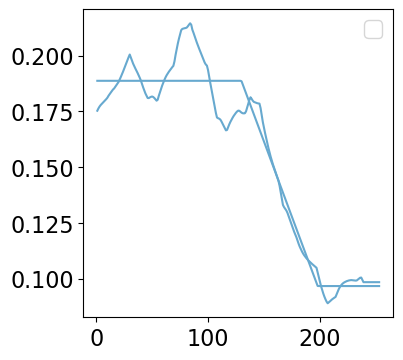

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


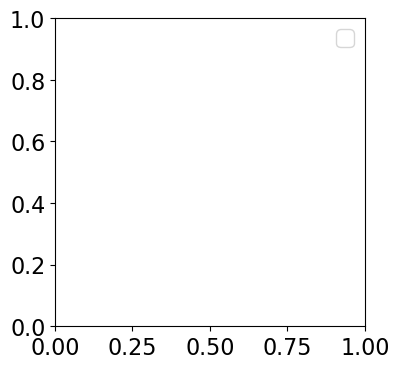

In [6]:
season_trans_obs, start_dates_obs, end_dates_obs = sig_obs.calc_seasontrans(t_valley=t_valley_manual_input)

(array([[2454007.00230441, 2454207.00230441, 2454286.49999286,
         2454316.51001864],
        [2454319.8775695 , 2454455.50002114, 2454570.12944303,
         2454676.49999872],
        [2454848.49994818, 2454936.04693072, 2454980.83135875,
         2455010.83135875],
        [2455072.47272438, 2455111.54902366, 2455252.74403076,
         2455414.50000847],
        [2455423.33447104, 2455453.33447104, 2455612.50012043,
         2455743.68474959],
        [2455828.31558532, 2455881.59389052, 2456067.34177154,
         2456135.54449886],
        [             nan,              nan,              nan,
                      nan]]),
 [Timestamp('2006-09-28 12:03:19.100692'),
  Timestamp('2007-08-07 09:03:42.004838'),
  Timestamp('2009-01-16 23:59:55.523054'),
  Timestamp('2009-08-28 23:20:43.386522'),
  Timestamp('2010-08-14 20:01:38.298037'),
  Timestamp('2011-09-23 19:34:26.572040'),
  Timestamp('2007-07-04 23:59:59.383070'),
  Timestamp('2008-04-13 15:06:23.877364'),
  Timestamp('2009

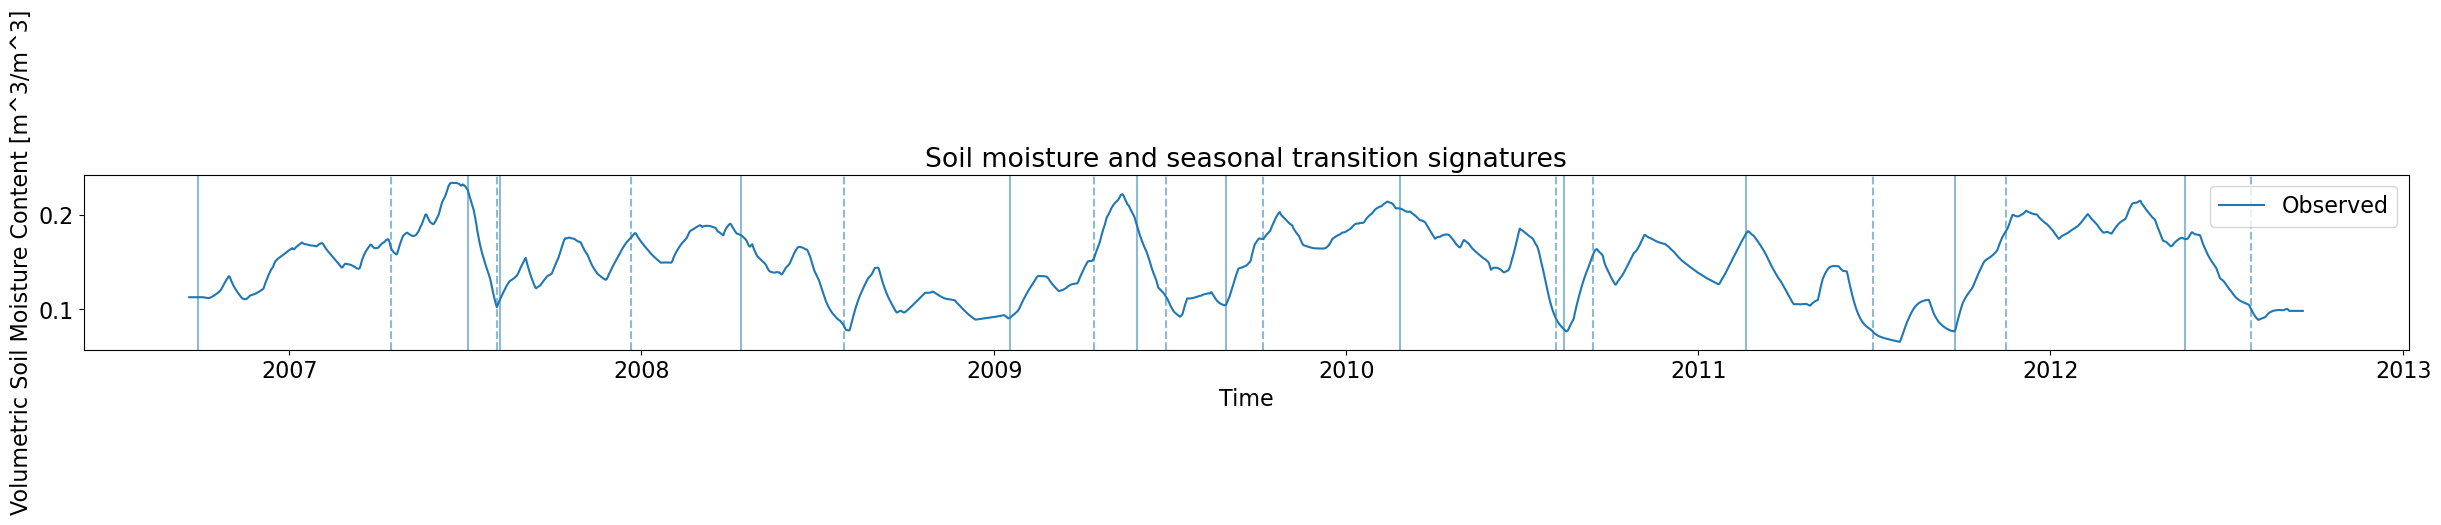

In [7]:

# Plot out the results
# df_obs = obs_synced
# df_sim = sim_synced
obs_label = 'Observed'
sim_label = 'Simulated'
obs_color = '#1f77b4'
sim_color = '#ff7f0e'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.png'

# Relative values of SM 
f2 = plt.figure(figsize=(30, 5))
ax2 = f2.add_subplot(2,1,1)
ax2.plot(sig_obs.tt.index, sig_obs.tt.values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(sig_sim.tt.index, sig_sim.tt.values, alpha=1, label=sim_label, color=sim_color)
# ax2.plot(df["Time"].values, df_obs[var_name].values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(df["Time"].values, df_sim[var_name].values, alpha=1, label=sim_label, color=sim_color)
for i in range(len(start_dates_obs)):
    ax2.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax2.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
# for i in range(len(start_dates_sim)):
#     ax2.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
# for i in range(len(end_dates_sim)):
#     ax2.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel(y_label)
ax2.set_title(title)
ax2.legend()

# f2.savefig(os.path.join(out_path, fn), dpi=600)
season_trans_obs, start_dates_obs, end_dates_obs

# Save the results


### Mahurangi

In [3]:
_data = pd.read_csv(r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\Mahurangi\test_sm_basinavg.csv")
_data = to_datetime(_data, "Time", format= r"%m/%d/%Y %H:%M")
data = _data["Soil Moisture Content"]

data.head()

Time
1998-02-20 11:00:00    0.348172
1998-02-20 12:00:00    0.348084
1998-02-20 13:00:00    0.348011
1998-02-20 14:00:00    0.354702
1998-02-20 15:00:00    0.354622
Name: Soil Moisture Content, dtype: float64

In [4]:
# Evaluate using seasonal soil moisture signature
sig_obs = SMSig(
    ts_time=data.index.to_numpy(),
    ts_value=data.to_numpy(),
    plot_results=True,
    plot_label="obs",
    verbose=True
)
# # sig_obs.detrend() # TODO:debug
# sig_obs.movmean()
# t_valley = sig_obs.calc_sinecurve()
# print(t_valley)

In [5]:
_t_valley_manual_input = pd.read_csv(r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\Mahurangi\seasonal_cycel_valleys.csv", header=None)
t_valley_manual_input = pd.to_datetime(_t_valley_manual_input[0])
t_valley_manual_input

0   1998-02-16
1   1999-02-16
2   2000-02-16
3   2001-02-15
4   2002-02-15
5   2003-02-15
Name: 0, dtype: datetime64[ns]

Processing 1998:0
dry2wet Shift=0.37 slope=0.00084 start timing: 0.900680 end timing: 108.744060


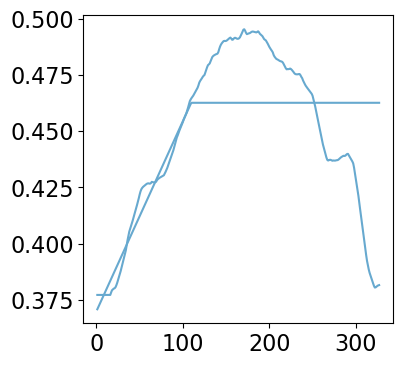

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 1999:0
dry2wet Shift=0.29 slope=0.00146 start timing: 62.528235 end timing: 58.580831


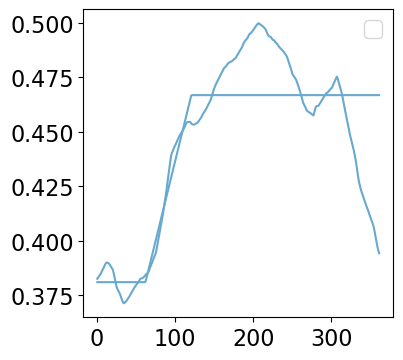

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2000:0
dry2wet Shift=0.20 slope=0.00196 start timing: 88.434572 end timing: 41.006137


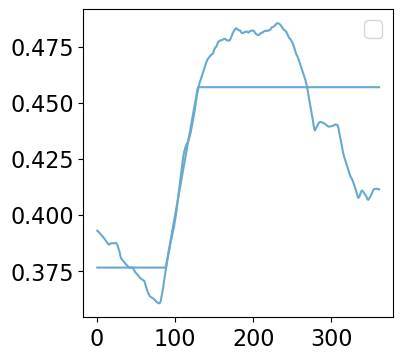

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2001:0
dry2wet Shift=0.30 slope=0.00127 start timing: 82.259703 end timing: 42.995173


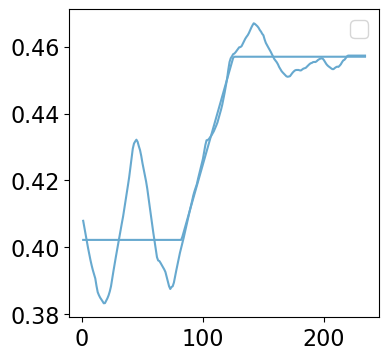

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2002:0
data is not good
Timeseries is empty


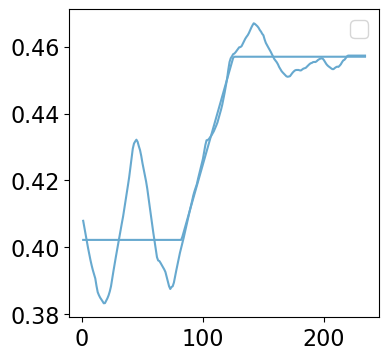

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 1998:1
wet2dry Shift=0.55 slope=-0.00087 start timing: 65.845834 end timing: 108.260791


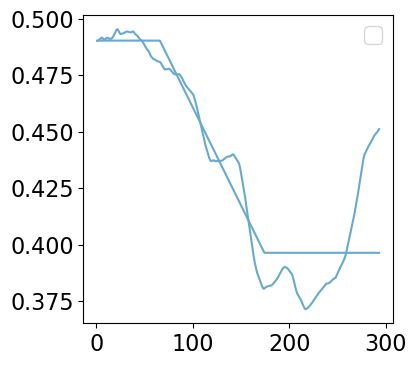

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 1999:1
wet2dry Shift=0.53 slope=-0.00071 start timing: 57.806397 end timing: 161.414685


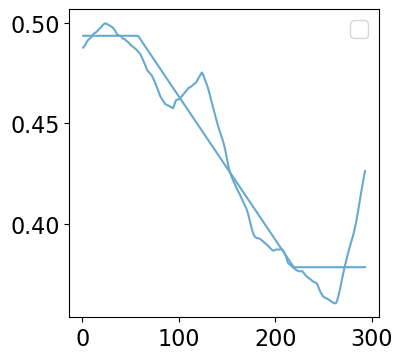

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2000:1
wet2dry Shift=0.52 slope=-0.00073 start timing: 53.999789 end timing: 101.528358


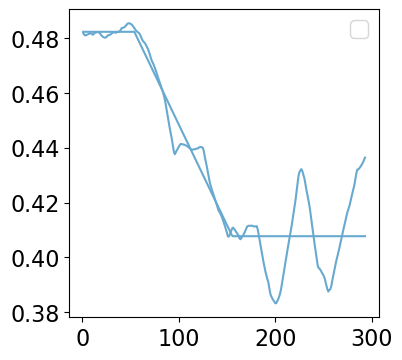

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2001:1
data is not good
Length of the timeseries is less than 90 days


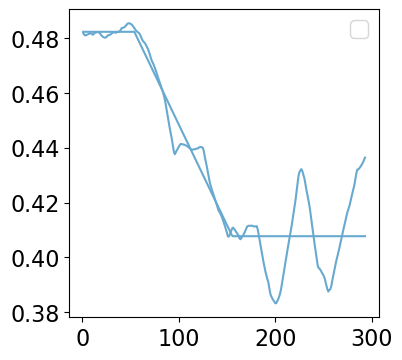

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2002:1
data is not good
Timeseries is empty


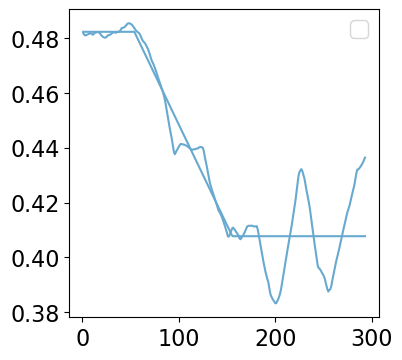

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


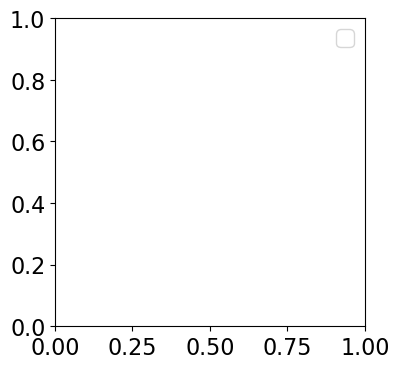

In [8]:
sig_obs = SMSig(
    ts_time=data.index.to_numpy(),
    ts_value=data.to_numpy(),
    plot_results=True,
    plot_label="obs",
    verbose=True
)
# sig_obs.detrend() # TODO:debug
season_trans_obs, start_dates_obs, end_dates_obs = sig_obs.calc_seasontrans(t_valley=t_valley_manual_input)

(array([[2450865.40067967, 2450974.14473949, 2451079.34583407,
         2451187.60662496],
        [2451258.02823541, 2451316.60906671, 2451436.30639658,
         2451597.72108125],
        [2451648.93457197, 2451689.94070863, 2451797.49978887,
         2451899.02814661],
        [             nan,              nan,              nan,
                      nan],
        [             nan,              nan,              nan,
                      nan],
        [             nan,              nan,              nan,
                      nan]]),
 [Timestamp('1998-02-20 21:36:58.723556'),
  Timestamp('1999-03-20 12:40:39.539366'),
  Timestamp('2000-04-14 10:25:47.018123'),
  Timestamp('2001-04-08 06:13:58.377051'),
  Timestamp('1998-09-22 20:18:00.063480'),
  Timestamp('1999-09-14 19:21:12.664457'),
  Timestamp('2000-09-09 23:59:41.758631')],
 [Timestamp('1998-06-09 15:28:25.491555'),
  Timestamp('1999-05-18 02:37:03.363443'),
  Timestamp('2000-05-25 10:34:37.225311'),
  Timestamp('2001-05-

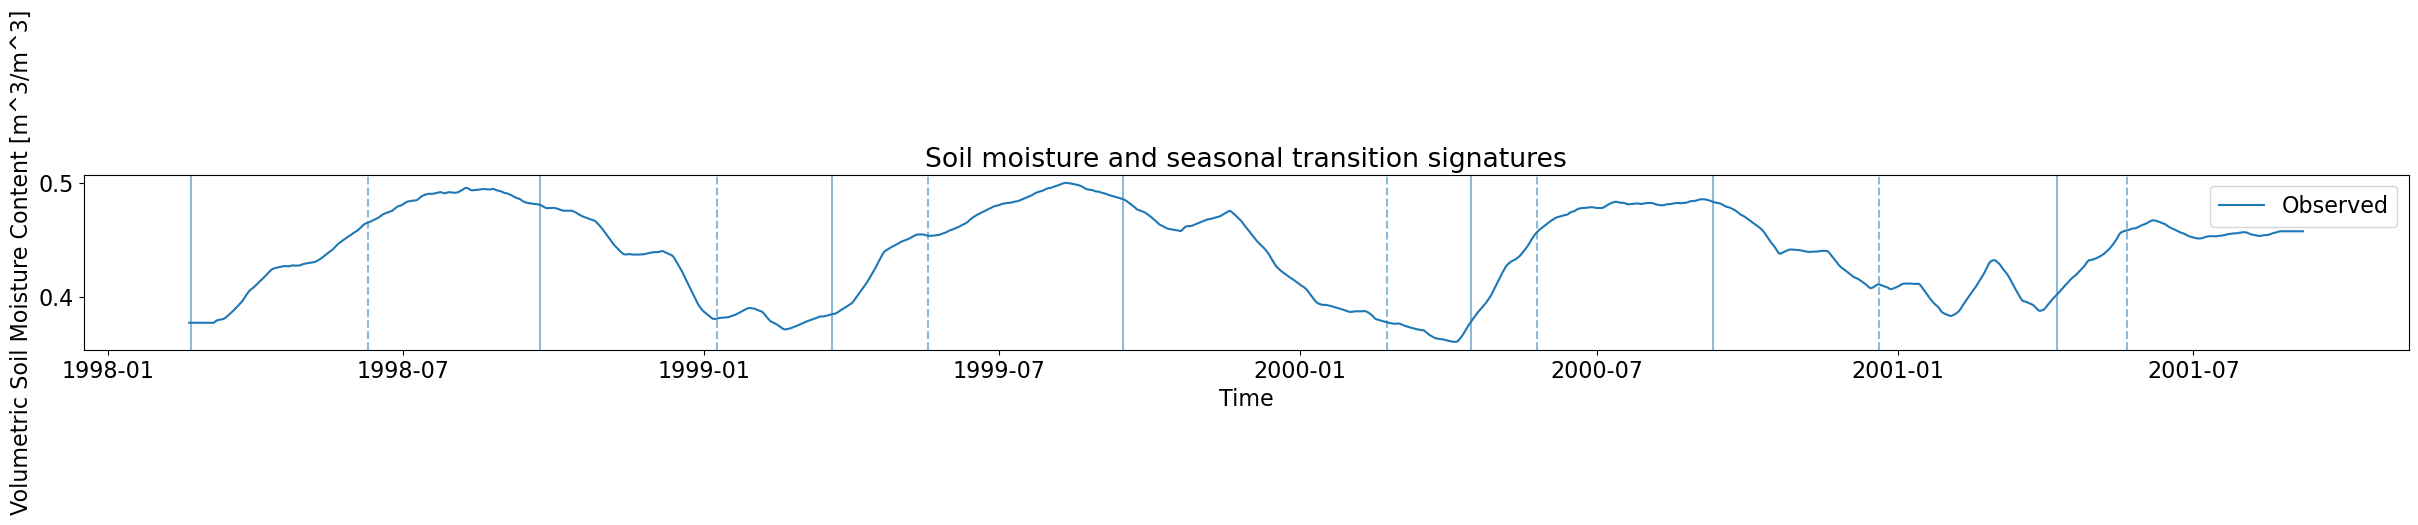

In [10]:

# Plot out the results
# df_obs = obs_synced
# df_sim = sim_synced
obs_label = 'Observed'
sim_label = 'Simulated'
obs_color = '#1f77b4'
sim_color = '#ff7f0e'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.png'

# Relative values of SM 
f2 = plt.figure(figsize=(30, 5))
ax2 = f2.add_subplot(2,1,1)
ax2.plot(sig_obs.tt.index, sig_obs.tt.values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(sig_sim.tt.index, sig_sim.tt.values, alpha=1, label=sim_label, color=sim_color)
# ax2.plot(df["Time"].values, df_obs[var_name].values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(df["Time"].values, df_sim[var_name].values, alpha=1, label=sim_label, color=sim_color)
for i in range(len(start_dates_obs)):
    ax2.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax2.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
# for i in range(len(start_dates_sim)):
#     ax2.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
# for i in range(len(end_dates_sim)):
#     ax2.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel(y_label)
ax2.set_title(title)
ax2.legend()

# f2.savefig(os.path.join(out_path, fn), dpi=600)
season_trans_obs, start_dates_obs, end_dates_obs

# Save the results